## 3 - Displaying Histograms and Crossplots

Created by: Andy McDonald

The following tutorial illustrates how to display well data from a LAS file on histograms and crossplots.

### Loading Well Data from CSV

The following cells load data in from a CSV file and replace the null values (-999.25) with Not a Number (NaN) values. More detail can be found in 1. Loading and Displaying Well Data From CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
well = pd.read_csv("data/L0509WellData.csv", header=0)

In [3]:
well.replace(-999.25, np.nan, inplace=True)

In [4]:
well

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343
...,...,...,...,...,...,...
1916,4801.4000,64.081604,62.997536,2.633956,-0.011572,0.098748
1917,4801.5000,56.813217,63.321045,2.630827,-0.016982,0.107114
1918,4801.6000,51.935394,63.320381,2.629536,-0.019666,0.114182
1919,4801.7000,49.111427,63.369019,2.629349,-0.020681,0.116993


### Displaying data on a histogram

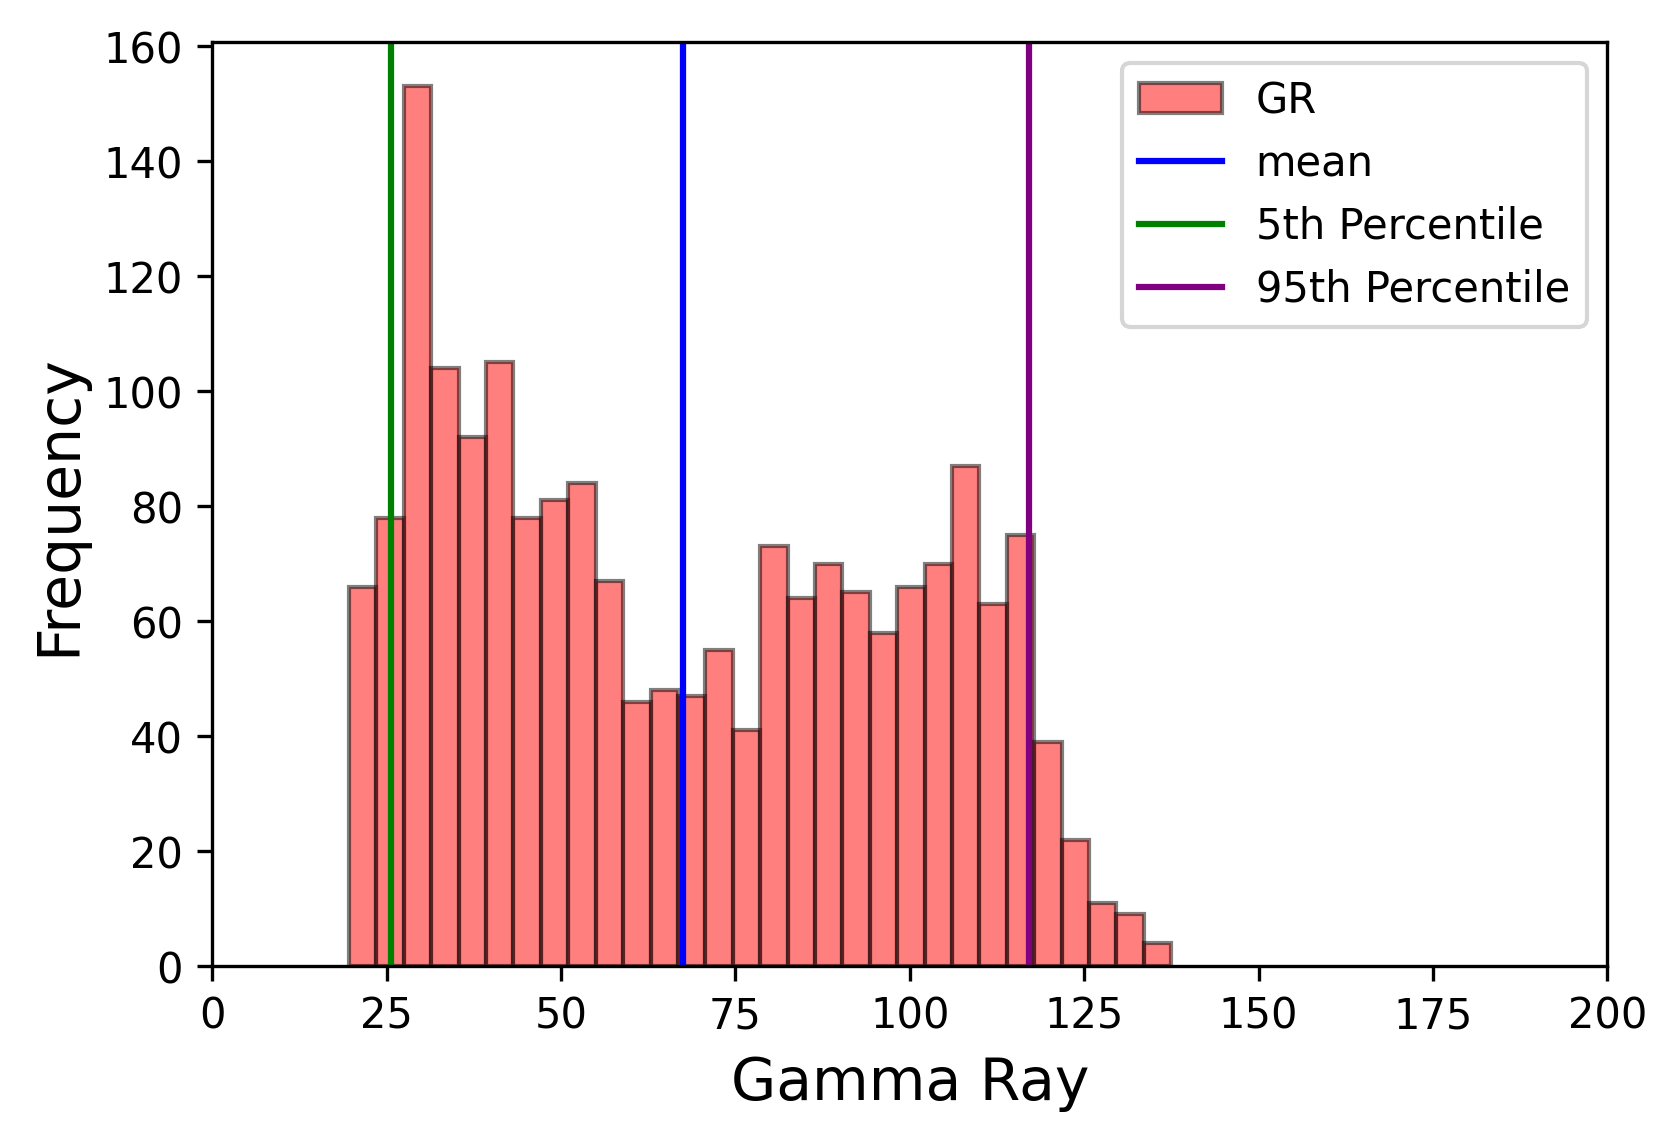

In [5]:
mean = well['GR'].mean()
p5 = well['GR'].quantile(0.05)
p95 = well['GR'].quantile(0.95)

plt.figure(figsize=(6,4), dpi=300)
well['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='purple', label='95th Percentile')

plt.legend()
plt.show()

Displaying a simple histogram can be done by calling the .hist function on the well dataframe and specifying the column.

array([[<Axes: title={'center': 'GR'}>]], dtype=object)

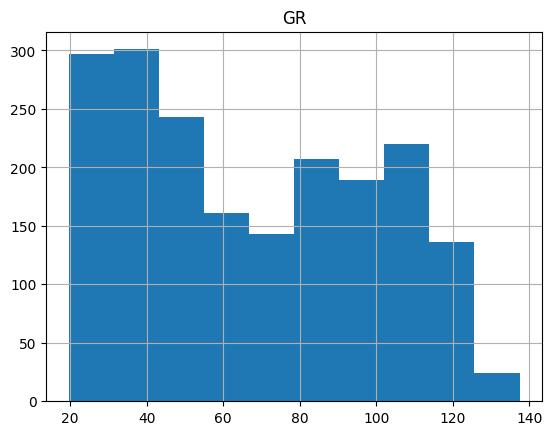

In [6]:
well.hist(column="GR")

The number of bins can be controled by the bins parameter:

array([[<Axes: title={'center': 'GR'}>]], dtype=object)

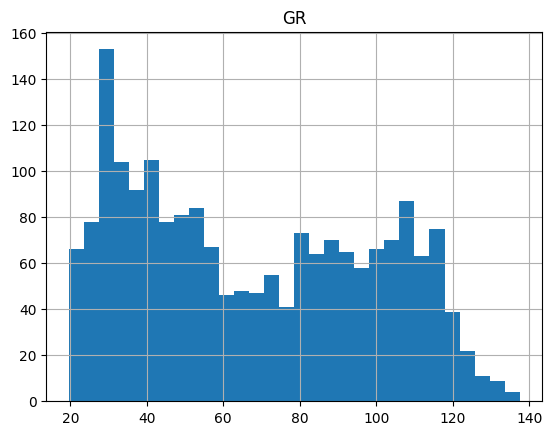

In [7]:
well.hist(column="GR", bins = 30)

We can also change the opacity of the bars by using the alpha parameter:

array([[<Axes: title={'center': 'GR'}>]], dtype=object)

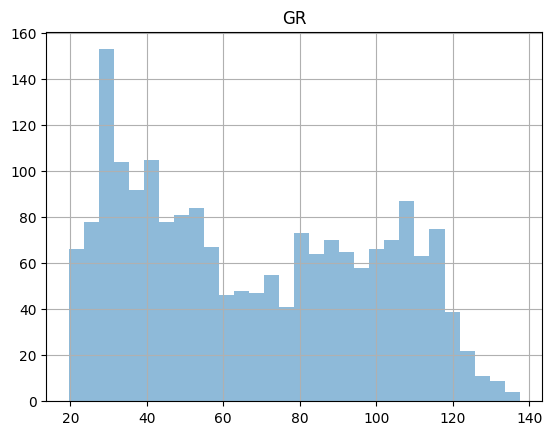

In [8]:
well.hist(column="GR", bins = 30, alpha = 0.5)

#### Plotting multiple histograms on one plot

It can be more efficient to loop over the columns (curves) within the dataframe and create a plot with multiple histograms, rather than duplicating the previous line multiple times. <br><br>

First we need to create a list of our curve names.

In [9]:
cols_to_plot = list(well)

We can remove the depth curve from our list and focus on our curves. The same line can be applied to other curves that need removing.

In [10]:
cols_to_plot.remove("DEPTH")

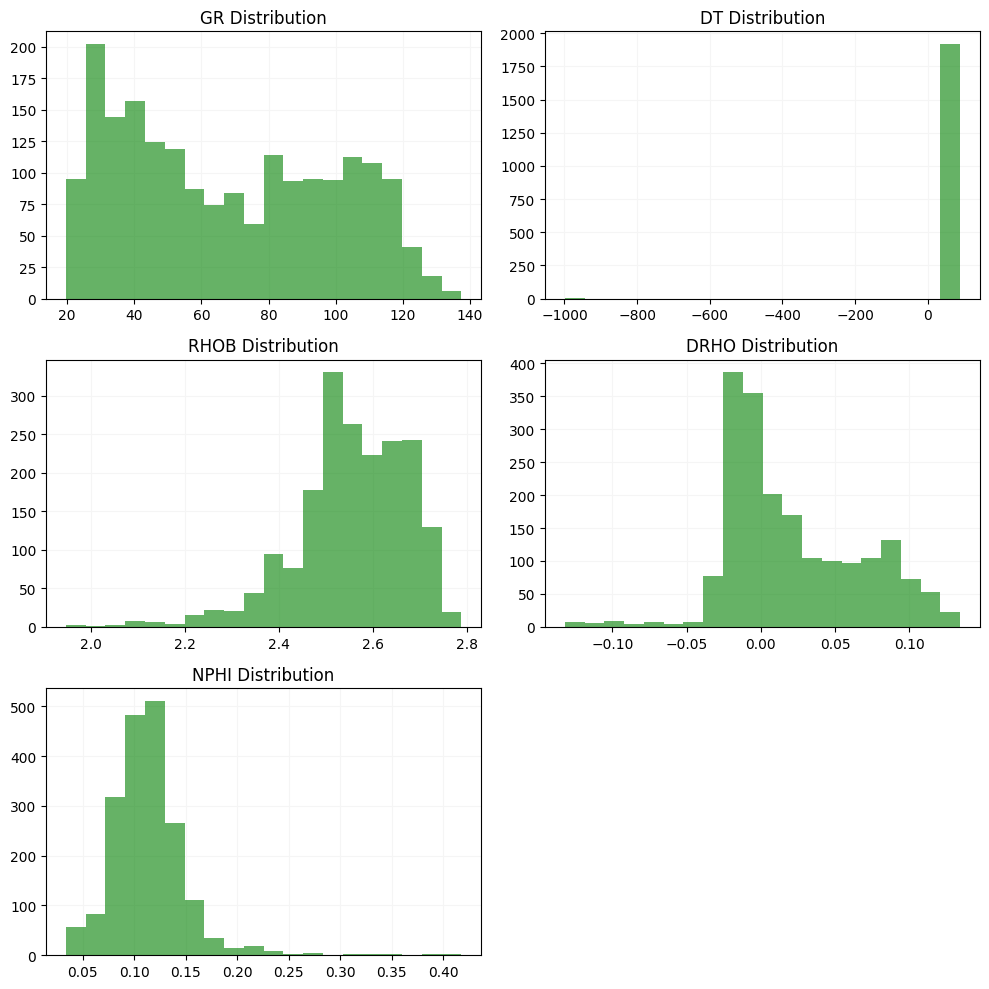

In [11]:
#Setup the number of rows and columns for our plot
rows = 3
cols = 2

fig=plt.figure(figsize=(10,10))

for i, feature in enumerate(cols_to_plot):
    ax=fig.add_subplot(rows,cols,i+1)
    well[feature].hist(bins=20,ax=ax,facecolor='green', alpha=0.6)
    ax.set_title(feature+" Distribution")
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

### Displaying data on a crossplot (Scatterplot)

As seen in the first notebook, we can display a crossplot by simply doing the following. using the c argument we can add a third curve to colour the data.

<Axes: xlabel='NPHI', ylabel='RHOB'>

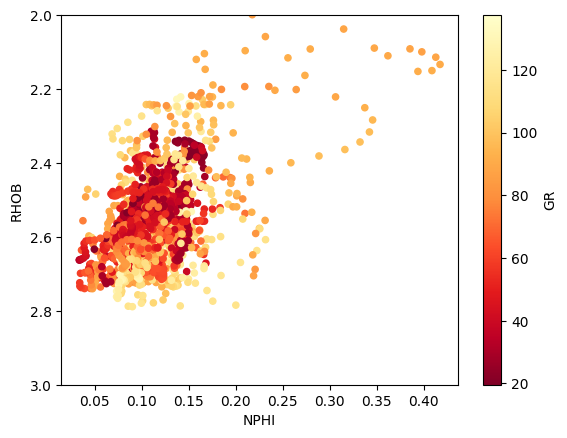

In [12]:
well.plot(kind="scatter", x="NPHI", y="RHOB", c="GR", 
          colormap="YlOrRd_r", ylim=(3,2))


We can take the above crossplot and create a 3D version. First we need to make sure the Jupyter notbook is setup for displaying interactive 3D plots using the following command.

In [13]:
%matplotlib inline

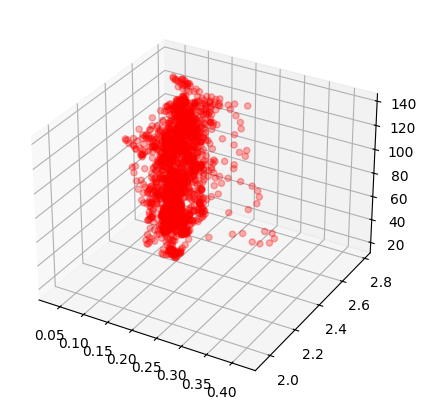

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(well["NPHI"], well["RHOB"], well["GR"], alpha= 0.3, c="r")

If we want to have multiple crossplots on view, we can do this by:

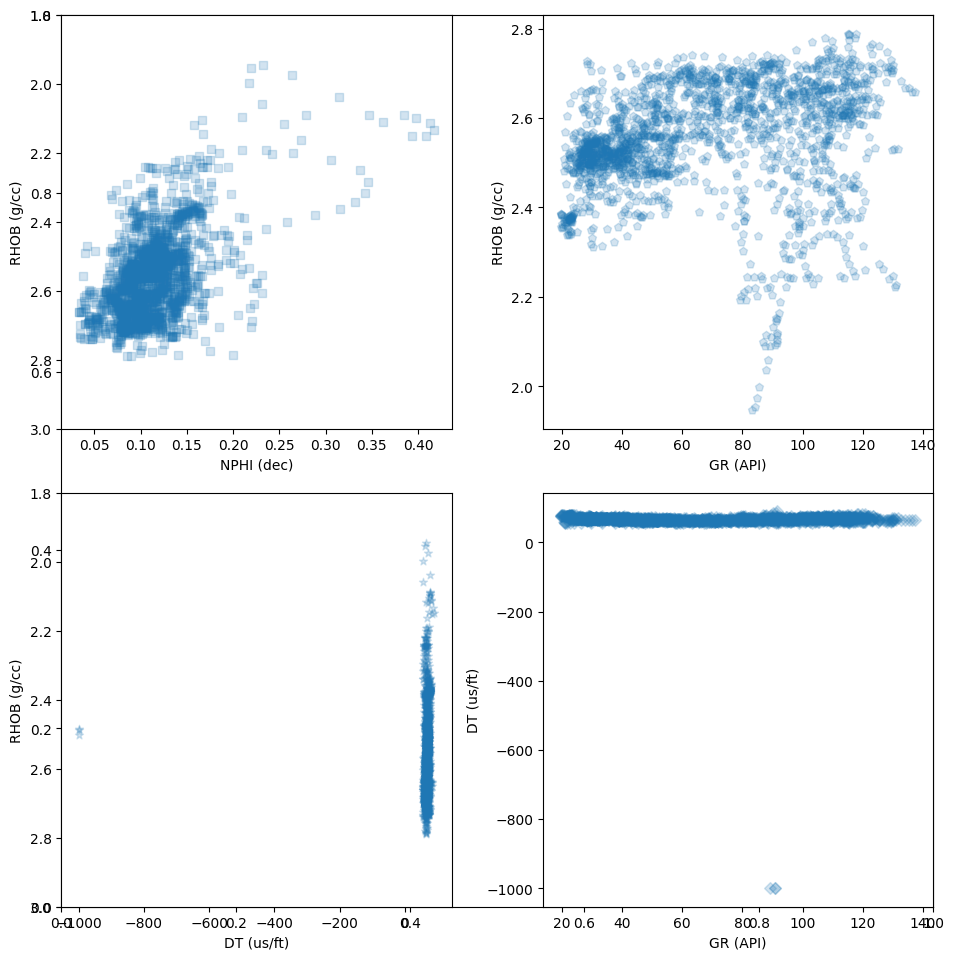

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)

ax1.scatter(x= "NPHI", y= "RHOB", data= well, marker="s", alpha= 0.2)
ax1.set_ylim(3, 1.8)
ax1.set_ylabel("RHOB (g/cc)")
ax1.set_xlabel("NPHI (dec)")


ax2.scatter(x= "GR", y= "RHOB", data= well, marker="p", alpha= 0.2)
ax1.set_ylim(3, 1.8)
ax2.set_ylabel("RHOB (g/cc)")
ax2.set_xlabel("GR (API)")

ax3.scatter(x= "DT", y= "RHOB", data= well, marker="*", alpha= 0.2)
ax3.set_ylim(3, 1.8)
ax3.set_ylabel("RHOB (g/cc)")
ax3.set_xlabel("DT (us/ft)")

ax4.scatter(x= "GR", y= "DT", data= well, marker="D", alpha= 0.2)
ax4.set_ylabel("DT (us/ft)")
ax4.set_xlabel("GR (API)")


plt.tight_layout()